In [ ]:
# Install rdkit
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 45.9 MB/s eta 0:00:00


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

paracetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol_molecule = Chem.MolFromSmiles(paracetamol_smiles)

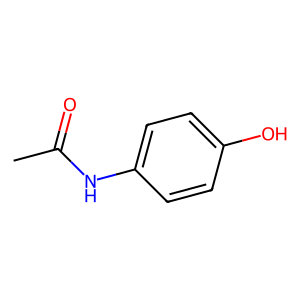

In [ ]:
Draw.MolToImage(paracetamol_molecule)

In [92]:
num_atoms = paracetamol_molecule.GetNumAtoms()
print(f"Number of atoms: {num_atoms}")

Number of atoms: 11
11


Smiles indique juste comment dessiner proprement la molécule mais n'indique pas tous les atomes tel que l'hydrogène, ce qui mène à un calcul de 11 atomes et non de 20.

In [ ]:
atoms = [atom.GetSymbol() for atom in paracetamol_molecule.GetAtoms()]
print(f"List of atoms: {atoms}")

List of atoms: ['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C']


In [ ]:
num_bonds = paracetamol_molecule.GetNumBonds()
print(f"Number of bonds: {num_bonds}")

Number of bonds: 11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [ ]:
import requests

url = "https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf"
response = requests.get(url)

if response.status_code == 200:
    with open("Morphine.sdf", "wb") as f:
        f.write(response.content)
else:
    print("Failed to download the SDF file.")

In [ ]:
from rdkit import Chem

supplier = Chem.SDMolSupplier("/content/Morphine.sdf")

morphine_molecule = next(supplier)

if morphine_molecule:
    print("Morphine molecule loaded successfully.")
else:
    print("Failed to load the Morphine molecule.")

Morphine molecule loaded successfully.


In [ ]:
from rdkit.Chem import AllChem

if morphine_molecule:
    # Compute the fingerprint as a bit vector (Morgan fingerprint)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(morphine_molecule, radius=2, nBits=2048)

    print(f"Fingerprint (Bit Vector):\n{fingerprint}")
else:
    print("Fingerprint computation failed because the molecule was not loaded.")

Fingerprint (Bit Vector):


## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import DiceSimilarity

paracetamol_smiles = "CC(=O)OC1=CC=CC=C1C(O)=O"

paracetamol_molecule = Chem.MolFromSmiles(paracetamol_smiles)
paracetamol_fingerprint = AllChem.GetMorganFingerprintAsBitVect(paracetamol_molecule, radius=2, nBits=1024)

paracetamol_np_vector = np.zeros((paracetamol_fingerprint.GetNumBits(),), dtype=np.int32)
for on_bit in paracetamol_fingerprint.GetOnBits():
    paracetamol_np_vector[on_bit] = 1

nonzero_elements_paracetamol = np.nonzero(paracetamol_np_vector)[0]

In [ ]:
print("Nonzero elements of Paracetamol's fingerprint vector:")
print(nonzero_elements_paracetamol)

Nonzero elements of Paracetamol's fingerprint vector:
[  11   23   33   64  175  356  386  389  423  444  456  592  650  695
  705  726  751  807  849  893  909  946  967 1017]


In [ ]:
aspirin_smiles = "CC(=O)NC1=CC=C(O)C=C1"

aspirin_molecule = Chem.MolFromSmiles(aspirin_smiles)
aspirin_fingerprint = AllChem.GetMorganFingerprintAsBitVect(aspirin_molecule, radius=2, nBits=1024)

aspirin_np_vector = np.zeros((aspirin_fingerprint.GetNumBits(),), dtype=np.int32)
for on_bit in aspirin_fingerprint.GetOnBits():
    aspirin_np_vector[on_bit] = 1

nonzero_elements_aspirin = np.nonzero(aspirin_np_vector)[0]

In [ ]:
print("Nonzero elements of Aspirin's fingerprint vector:")
print(nonzero_elements_aspirin)

Nonzero elements of Aspirin's fingerprint vector:
[  33   53  128  191  245  289  356  530  578  650  726  745  754  792
  807  843  849  893 1017]


In [ ]:
dice_similarity = DiceSimilarity(paracetamol_fingerprint, aspirin_fingerprint)

In [ ]:
print("\nDice Similarity between Paracetamol and Aspirin:")
print(dice_similarity)


Dice Similarity between Paracetamol and Aspirin:
0.37209302325581395


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [ ]:
from rdkit.ML.Descriptors import MoleculeDescriptors

paracetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"

paracetamol_molecule = Chem.MolFromSmiles(paracetamol_smiles)

if paracetamol_molecule is not None:

    descriptor_names = [
        "MolWt",  # Molecular weight
        "LogP",   # Log partition coefficient
        "TPSA"    # Polar surface area
    ]

    descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

    descriptors = descriptor_calculator.CalcDescriptors(paracetamol_molecule)

    for name, value in zip(descriptor_names, descriptors):
        print(f"{name}: {value}")
else:
    print("Failed to create a molecule from the given SMILES.")

MolWt: 151.165
LogP: 777
TPSA: 49.33


## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]

pattern_ccc = Chem.MolFromSmarts("CCC")

ccc_molecules = [Chem.MolFromSmiles(mol) for mol in smiles_list if Chem.MolFromSmiles(mol) and Chem.MolFromSmiles(mol).HasSubstructMatch(pattern_ccc)]

Molecules containing 'CCC' pattern:


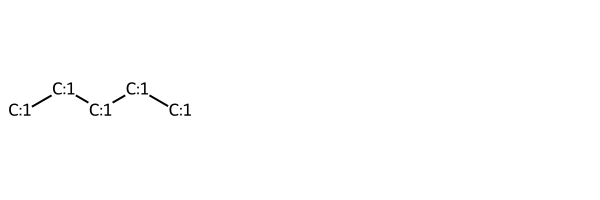

In [ ]:
def highlight_pattern(mol, pattern):
    matches = mol.GetSubstructMatches(pattern)
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    for match in matches:
        for atom_idx in match:
            mol.GetAtomWithIdx(atom_idx).SetAtomMapNum(1)
    return mol

highlighted_ccc_molecules = [highlight_pattern(mol, pattern_ccc) for mol in ccc_molecules]

print("Molecules containing 'CCC' pattern:")
Draw.MolsToGridImage(highlighted_ccc_molecules, molsPerRow=3)

Molecules containing 'C(=O)N' pattern:


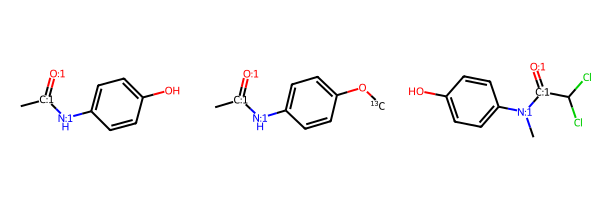

In [ ]:
pattern_con = Chem.MolFromSmarts("C(=O)N")

con_molecules = [Chem.MolFromSmiles(mol) for mol in smiles_list if Chem.MolFromSmiles(mol) and Chem.MolFromSmiles(mol).HasSubstructMatch(pattern_con)]
highlighted_con_molecules = [highlight_pattern(mol, pattern_con) for mol in con_molecules]

print("Molecules containing 'C(=O)N' pattern:")
Draw.MolsToGridImage(highlighted_con_molecules, molsPerRow=3)

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [ ]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2023-09-24 16:42:45--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  6.54MB/s    in 0.2s    

2023-09-24 16:42:46 (6.54 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import SDMolSupplier

supplier = SDMolSupplier("/content/solubility.train.sdf", removeHs=False)
molecule_list = [mol for mol in supplier if mol is not None]

In [ ]:
def calculate_descriptors(mol):
    descriptor_names = [
        "MolWt",  # Molecular weight
        "HeavyAtomMolWt",
        "NumRadicalElectrons",
        "NumValenceElectrons"
    ]

    descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

    return descriptor_calculator.CalcDescriptors(mol)


In [ ]:
data = []
for mol in molecule_list:
    descriptors = calculate_descriptors(mol)
    data.append(descriptors)

df = pd.DataFrame(data, columns=["MolWt", "HeavyAtomMolWt", "NumRadicalElectrons", "NumValenceElectrons"])

In [ ]:
labels = [float(mol.GetProp('SOL')) for mol in molecule_list]


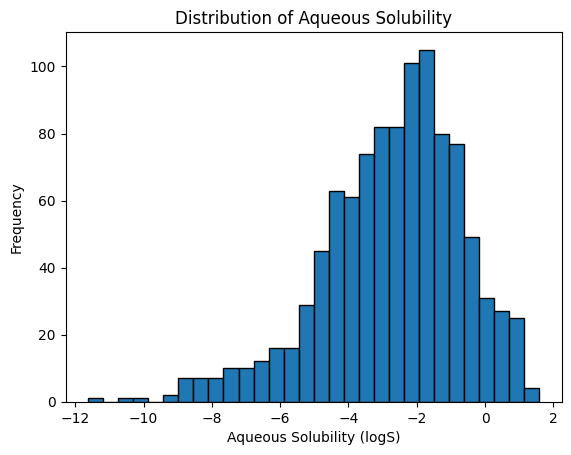

    MolWt  HeavyAtomMolWt  NumRadicalElectrons  NumValenceElectrons
0  72.151          60.055                    0                   32
1  70.135          60.055                    0                   30
2  86.178          72.066                    0                   38
3  86.178          72.066                    0                   38
4  86.178          72.066                    0                   38


In [ ]:
plt.hist(labels, bins=30, edgecolor='k')
plt.xlabel("Aqueous Solubility (logS)")
plt.ylabel("Frequency")
plt.title("Distribution of Aqueous Solubility")
plt.show()

print(df.head())

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

nan_rows = df[df.isnull().any(axis=1)]
if not nan_rows.empty:
    print(f"Rows with NaN values:\n{nan_rows}")
    df.dropna(inplace=True)
    labels = [labels[i] for i in range(len(labels)) if labels[i] is not null]
print(len(nan_rows.index))


0


In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, labels, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.527948772819945


## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [ ]:
# 1. Download the file
![ -e solubility.test.sdf ] || wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf

--2023-09-24 18:06:39--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245735 (240K) [text/plain]
Saving to: ‘solubility.test.sdf’

solubility.test.sdf 100%[===================>] 239.98K  --.-KB/s    in 0.1s    

2023-09-24 18:06:40 (1.84 MB/s) - ‘solubility.test.sdf’ saved [245735/245735]



In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import SDMolSupplier
from sklearn.preprocessing import MinMaxScaler

test_sdf_file = "/content/solubility.test.sdf"
list_molecule_test = SDMolSupplier(test_sdf_file, removeHs=False)

In [ ]:
test_molecule = list_molecule_test[0]

test_descriptors = calculate_descriptors(test_molecule)

data_molecule = []

descriptors = calculate_descriptors(mol)
data_molecule.append(test_descriptors)

df_molecule = pd.DataFrame(data_molecule, columns=["MolWt", "HeavyAtomMolWt", "NumRadicalElectrons", "NumValenceElectrons"])

In [ ]:
test_descriptors_normalized = scaler.fit_transform(df_molecule)


In [ ]:
predicted_logS = regressor.predict(test_descriptors_normalized)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
real_logS = float(test_molecule.GetProp('SOL'))
print(f"Predicted logS: {predicted_logS[0]:.4f}")
print(f"Real logS: {real_logS:.4f}")

Predicted logS: -0.8628
Real logS: -3.6800
